In [1]:
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 header=None
)

In [2]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
import matplotlib.pyplot as plt
import numpy as np

def standardize_labels(s): 
    if (s == 'Iris-setosa'):
        return -1
    else:
        return 1

_D = df.iloc[0:100, [0, 2, 4]]
_D[4] = _D[4].map(standardize_labels)
D =_D.values
D

array([[ 5.1,  1.4, -1. ],
       [ 4.9,  1.4, -1. ],
       [ 4.7,  1.3, -1. ],
       [ 4.6,  1.5, -1. ],
       [ 5. ,  1.4, -1. ],
       [ 5.4,  1.7, -1. ],
       [ 4.6,  1.4, -1. ],
       [ 5. ,  1.5, -1. ],
       [ 4.4,  1.4, -1. ],
       [ 4.9,  1.5, -1. ],
       [ 5.4,  1.5, -1. ],
       [ 4.8,  1.6, -1. ],
       [ 4.8,  1.4, -1. ],
       [ 4.3,  1.1, -1. ],
       [ 5.8,  1.2, -1. ],
       [ 5.7,  1.5, -1. ],
       [ 5.4,  1.3, -1. ],
       [ 5.1,  1.4, -1. ],
       [ 5.7,  1.7, -1. ],
       [ 5.1,  1.5, -1. ],
       [ 5.4,  1.7, -1. ],
       [ 5.1,  1.5, -1. ],
       [ 4.6,  1. , -1. ],
       [ 5.1,  1.7, -1. ],
       [ 4.8,  1.9, -1. ],
       [ 5. ,  1.6, -1. ],
       [ 5. ,  1.6, -1. ],
       [ 5.2,  1.5, -1. ],
       [ 5.2,  1.4, -1. ],
       [ 4.7,  1.6, -1. ],
       [ 4.8,  1.6, -1. ],
       [ 5.4,  1.5, -1. ],
       [ 5.2,  1.5, -1. ],
       [ 5.5,  1.4, -1. ],
       [ 4.9,  1.5, -1. ],
       [ 5. ,  1.2, -1. ],
       [ 5.5,  1.3, -1. ],
 

In [44]:
'''
This function is used to test the math of
create_test_train_partition.
'''
def split_array(arr, percentage):
    split_index = int(percentage * len(arr))
    arr1 = arr[:split_index]
    arr2 = arr[split_index:]
    print(percentage, split_index, arr1, arr2, sep="\t")
    return arr1, arr2

percentages = [i * 0.1 for i in range(11)]
arr = [i+1 for i in range(10)]
for percentage in percentages:
    split_array(arr, percentage)

0.0	0	[]	[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
0.1	1	[1]	[2, 3, 4, 5, 6, 7, 8, 9, 10]
0.2	2	[1, 2]	[3, 4, 5, 6, 7, 8, 9, 10]
0.30000000000000004	3	[1, 2, 3]	[4, 5, 6, 7, 8, 9, 10]
0.4	4	[1, 2, 3, 4]	[5, 6, 7, 8, 9, 10]
0.5	5	[1, 2, 3, 4, 5]	[6, 7, 8, 9, 10]
0.6000000000000001	6	[1, 2, 3, 4, 5, 6]	[7, 8, 9, 10]
0.7000000000000001	7	[1, 2, 3, 4, 5, 6, 7]	[8, 9, 10]
0.8	8	[1, 2, 3, 4, 5, 6, 7, 8]	[9, 10]
0.9	9	[1, 2, 3, 4, 5, 6, 7, 8, 9]	[10]
1.0	10	[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]	[]


In [46]:
def create_test_train_partition(D, train_percentage=0.7):
    '''
    Parameters
    ------------
    D : [array-like], shape = [n_samples, n_features + 1]
        where n_samples is the number of samples and 
        n_features is the number of features.
        D[i] = [...X, y ], where X is an input vector
        and y is its corresponding label. 

    train_percentage: float
        percentage of D that comprises the train
        part of the train-test partition.
        0 <= train_percentage <= 1
        
    Returns 
    -------
    D_train: [array-like], 
             shape = [int(n_samples * train_percentage), n_features + 1]
    D_test:  [array-like], 
             shape = [n_samples - int(n_samples * train_percentage), n_features + 1]
    '''
    D_copy = D[:]
    np.random.shuffle(D_copy)
    split_index = int(train_percentage * len(D))
    D_train = D_copy[:split_index]
    D_test = D_copy[split_index:]
    return D_train, D_test



In [47]:
D_train, D_test = create_test_train_partition(D)

len(D_train), len(D_test)

(70, 30)

In [48]:
D_train

array([[ 5. ,  1.6, -1. ],
       [ 5.5,  1.4, -1. ],
       [ 5.1,  1.7, -1. ],
       [ 5.1,  1.9, -1. ],
       [ 4.8,  1.9, -1. ],
       [ 5.1,  1.5, -1. ],
       [ 6.1,  4.7,  1. ],
       [ 5. ,  1.6, -1. ],
       [ 5.7,  1.7, -1. ],
       [ 4.6,  1. , -1. ],
       [ 5. ,  1.2, -1. ],
       [ 6.6,  4.4,  1. ],
       [ 4.8,  1.6, -1. ],
       [ 5.2,  1.4, -1. ],
       [ 5.8,  4.1,  1. ],
       [ 5.5,  3.8,  1. ],
       [ 5.6,  4.1,  1. ],
       [ 4.3,  1.1, -1. ],
       [ 6. ,  4.5,  1. ],
       [ 4.5,  1.3, -1. ],
       [ 5.8,  4. ,  1. ],
       [ 5.9,  4.2,  1. ],
       [ 4.4,  1.4, -1. ],
       [ 5.4,  4.5,  1. ],
       [ 5.8,  3.9,  1. ],
       [ 5.7,  4.2,  1. ],
       [ 6.2,  4.3,  1. ],
       [ 5.4,  1.5, -1. ],
       [ 4.8,  1.4, -1. ],
       [ 6.2,  4.5,  1. ],
       [ 6.7,  4.7,  1. ],
       [ 6. ,  4. ,  1. ],
       [ 6.4,  4.3,  1. ],
       [ 5.2,  1.5, -1. ],
       [ 6.6,  4.6,  1. ],
       [ 5.2,  3.9,  1. ],
       [ 5. ,  1.6, -1. ],
 

In [53]:
'''
D_train_setosa
D_train_versicolor
D_test_setosa
D_test_versicolor
'''

D_train_setosa = D_train[ D_train[:, 2] == -1 ]
D_train_versicolor = D_train[ D_train[:, 2] == 1 ]
D_test_setosa = D_test[ D_test[:, 2] == -1 ]
D_test_versicolor = D_test[ D_test[:, 2] == 1 ]

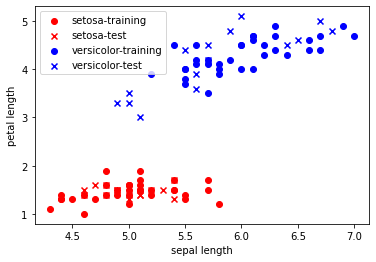

In [54]:
plt.scatter(
    D_train_setosa[:, 0],
    D_train_setosa[:, 1],
    color='red',
    marker='o',
    label='setosa-training'
)

plt.scatter(
    D_test_setosa[:, 0],
    D_test_setosa[:, 1],
    color='red',
    marker='x',
    label='setosa-test'
)

plt.scatter(
    D_train_versicolor[:, 0],
    D_train_versicolor[:, 1],
    color='blue',
    marker='o',
    label='versicolor-training'
)

plt.scatter(
    D_test_versicolor[:, 0],
    D_test_versicolor[:, 1],
    color='blue',
    marker='x',
    label='versicolor-test'
)

plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()